In [27]:
from torch import nn, optim
import torch
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch.nn.functional as F

%matplotlib inline

In [2]:
with open('./PITdf.pkl','rb') as f:
    PITdf = pickle.load(f)
with open('./GREdf.pkl','rb') as f:
    GREdf = pickle.load(f)
with open('./JONdf.pkl','rb') as f:
    JONdf = pickle.load(f)
with open('./MGTdf.pkl','rb') as f:
    MGTdf = pickle.load(f)
with open('./WASdf.pkl','rb') as f:
    WASdf = pickle.load(f)
with open('./WHLdf.pkl','rb') as f:
    WHLdf = pickle.load(f)
with open('./PKSdf.pkl','rb') as f:
    PKSdf = pickle.load(f)
with open('./CBGdf.pkl','rb') as f:
    CBGdf = pickle.load(f)
with open('./STUdf.pkl','rb') as f:
    STUdf = pickle.load(f)
with open('./NPHdf.pkl','rb') as f:
    NPHdf = pickle.load(f)
with open('./ELVdf.pkl','rb') as f:
    ELVdf = pickle.load(f)
with open('./YGTdf.pkl','rb') as f:
    YGTdf = pickle.load(f)
with open('./NCSdf.pkl','rb') as f:
    NCSdf = pickle.load(f)
with open('./BUTdf.pkl','rb') as f:
    BUTdf = pickle.load(f)
with open('./KITdf.pkl','rb') as f:
    KITdf = pickle.load(f)

In [3]:
print(PITdf)

        Year  Month  Day  Hour  Minute  DNI  Wind Speed  Wind Direction  \
0       1998      1    1     0       0  0.0         0.6           241.0   
1       1998      1    1     0      30  0.0         0.6           241.0   
2       1998      1    1     1       0  0.0         0.6           238.0   
3       1998      1    1     1      30  0.0         0.6           238.0   
4       1998      1    1     2       0  0.0         0.6           225.8   
...      ...    ...  ...   ...     ...  ...         ...             ...   
367915  2018     12   31    21      30  0.0         0.4           301.0   
367916  2018     12   31    22       0  0.0         0.4           298.0   
367917  2018     12   31    22      30  0.0         0.4           295.0   
367918  2018     12   31    23       0  0.0         0.5           293.0   
367919  2018     12   31    23      30  0.0         0.5           292.0   

          wind_x    wind_y         day_x     day_y    time_x    time_y  \
0      -0.524772 -0.29088

In [9]:
conditions = [
    (PITdf['DNI'] <= 100),
    (PITdf['DNI'] > 100) & (PITdf['DNI'] <= 200),
    (PITdf['DNI'] > 200) & (PITdf['DNI'] <= 300),
    (PITdf['DNI'] > 300) & (PITdf['DNI'] <= 400),
    (PITdf['DNI'] > 400) & (PITdf['DNI'] <= 500),
    (PITdf['DNI'] > 500) & (PITdf['DNI'] <= 600),
    (PITdf['DNI'] > 600) & (PITdf['DNI'] <= 700),
    (PITdf['DNI'] > 700) & (PITdf['DNI'] <= 800),
    (PITdf['DNI'] > 800) & (PITdf['DNI'] <= 900),
    (PITdf['DNI'] > 900)
]

values = [0,1,2,3,4,5,6,7,8,9]

PITdf['DNI_lower_bd_bin'] = np.select(conditions, values)

In [10]:
print(PITdf.head(50))

    Year  Month  Day  Hour  Minute    DNI  Wind Speed  Wind Direction  \
0   1998      1    1     0       0    0.0         0.6           241.0   
1   1998      1    1     0      30    0.0         0.6           241.0   
2   1998      1    1     1       0    0.0         0.6           238.0   
3   1998      1    1     1      30    0.0         0.6           238.0   
4   1998      1    1     2       0    0.0         0.6           225.8   
5   1998      1    1     2      30    0.0         0.5           225.8   
6   1998      1    1     3       0    0.0         0.5           214.4   
7   1998      1    1     3      30    0.0         0.5           214.4   
8   1998      1    1     4       0    0.0         0.5           203.6   
9   1998      1    1     4      30    0.0         0.5           203.6   
10  1998      1    1     5       0    0.0         0.6           195.2   
11  1998      1    1     5      30    0.0         0.6           195.2   
12  1998      1    1     6       0    0.0         0

In [11]:
one_hot_labels = np.zeros((len(PITdf),10))

for i in range(len(PITdf)):
    one_hot_labels[i, PITdf['DNI_lower_bd_bin'][i]] = 1

In [17]:
print(one_hot_labels[20:30])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


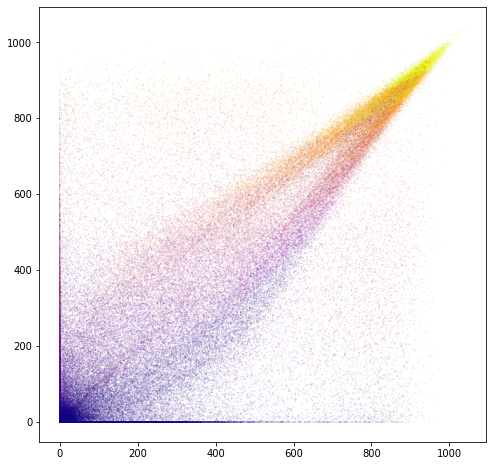

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
x = PITdf['DNI'][0:-2]
y = PITdf['DNI'][1:-1]

plt.scatter(x, y, c = PITdf['DNI_lower_bd_bin'][2:], s = 0.01, cmap = 'plasma', alpha = 0.5)
plt.show()

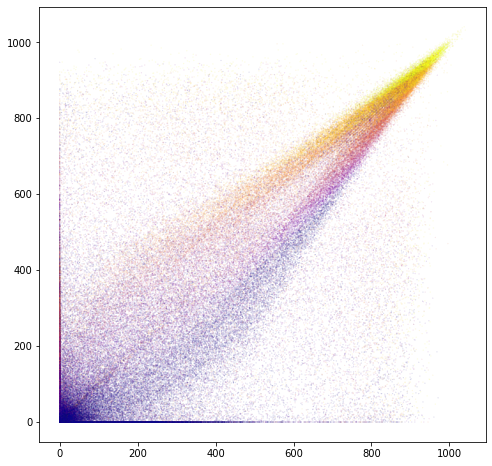

In [40]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
x = PITdf['DNI'][0:-3]
y = PITdf['DNI'][1:-2]

plt.scatter(x, y, c = PITdf['DNI_lower_bd_bin'][3:], s = 0.01, cmap = 'plasma', alpha = 0.5)
plt.show()

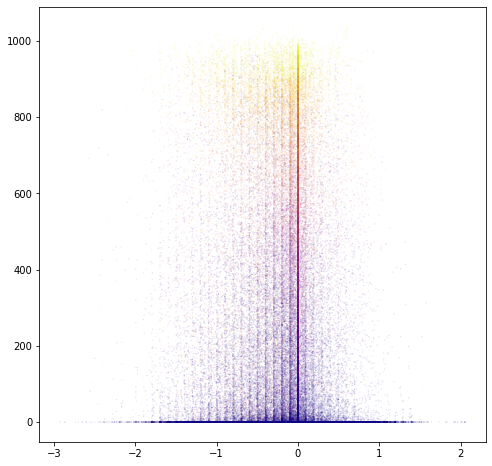

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
x = KITdf['wind_x'][0:-1]
y = KITdf['DNI'][0:-1]

plt.scatter(x, y, c = PITdf['DNI_lower_bd_bin'][1:], s = 0.01, cmap = 'plasma', alpha = 0.5)
plt.show()

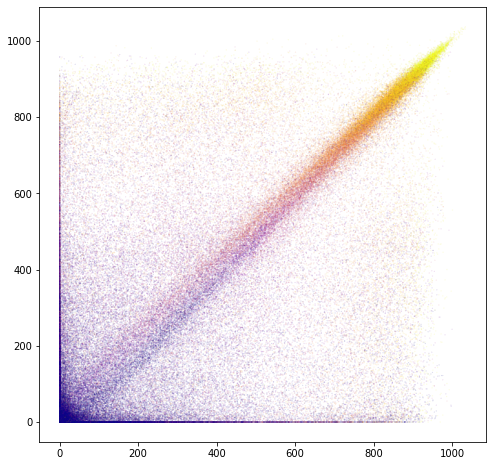

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
x = YGTdf['DNI'][0:-1]
y = KITdf['DNI'][0:-1]

plt.scatter(x, y, c = PITdf['DNI_lower_bd_bin'][1:], s = 0.01, cmap = 'plasma', alpha = 0.5)
plt.show()